# IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly .graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings('ignore')
import plotly as py


# DATA EXPLORATION

In [ ]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# DATA VISUALIZATION





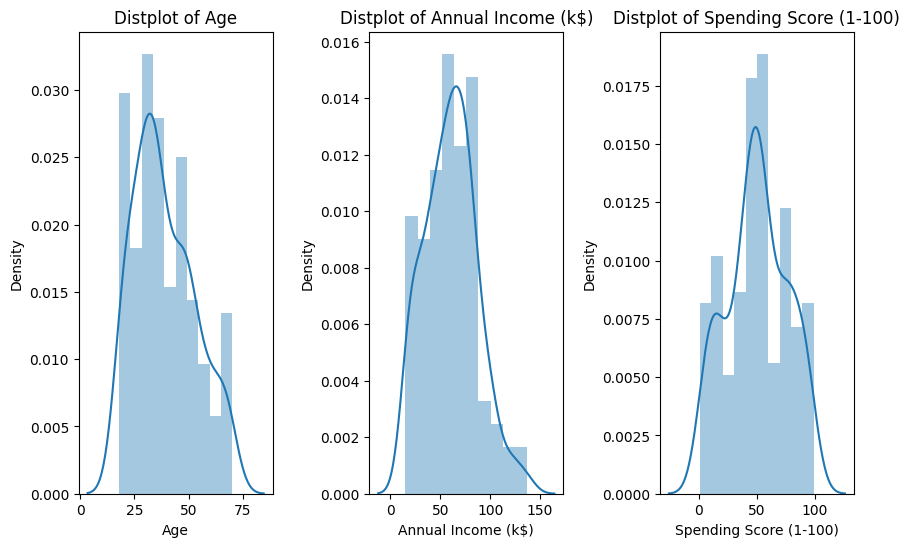

In [ ]:
plt.figure(figsize=(10,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

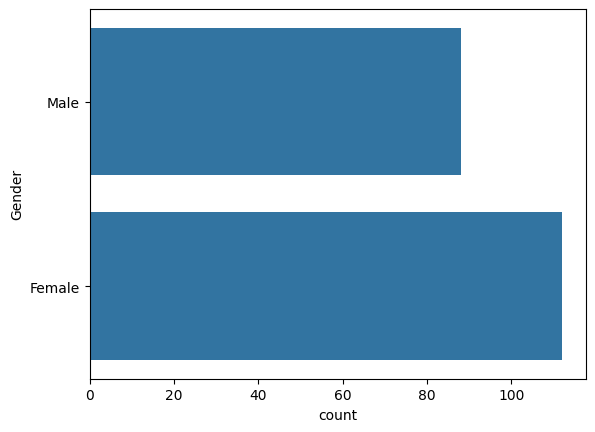

In [ ]:
#count plot of gender
sns.countplot(df['Gender'])
plt.show()

In [ ]:
#number of female is more than number of male


In [ ]:
#plotting the relationship between age,annual income and spending score


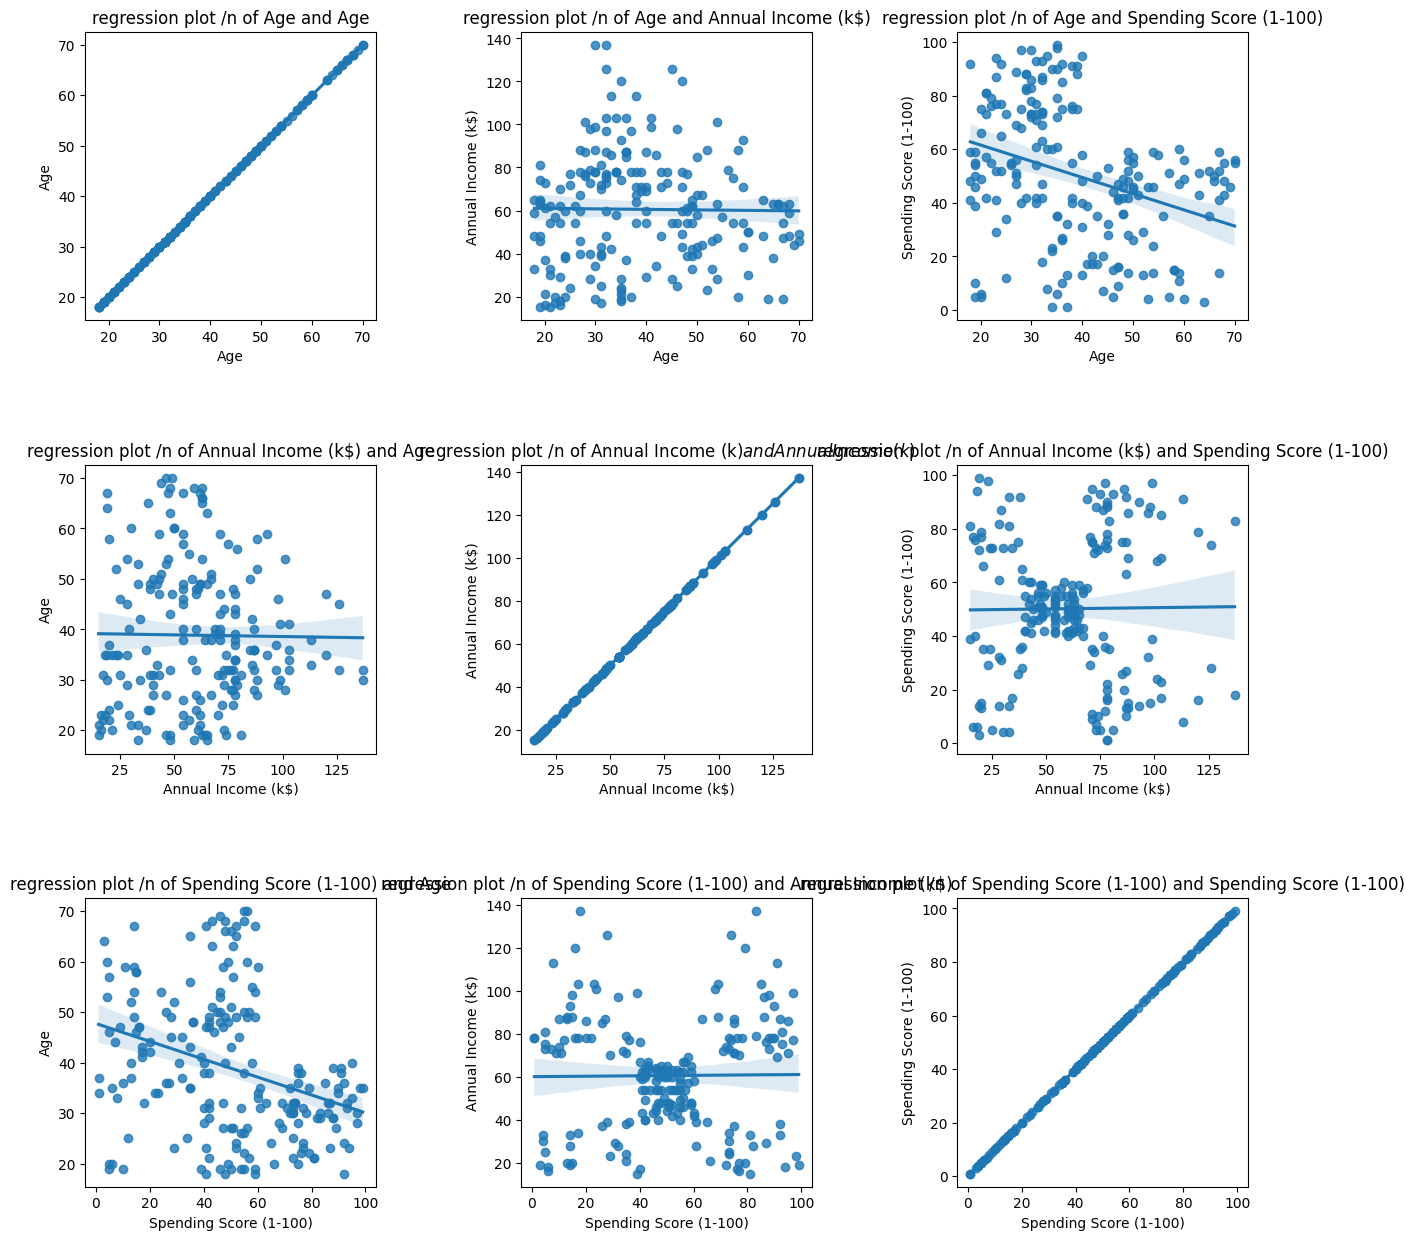

In [ ]:
plt.figure(1,figsize=(15,15))

n=0

for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    for y in ['Age','Annual Income (k$)','Spending Score (1-100)']:
        n+=1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(x= x,y= y,data= df)
        plt.title('regression plot /n of {} and {}'.format(x,y))

plt.show()

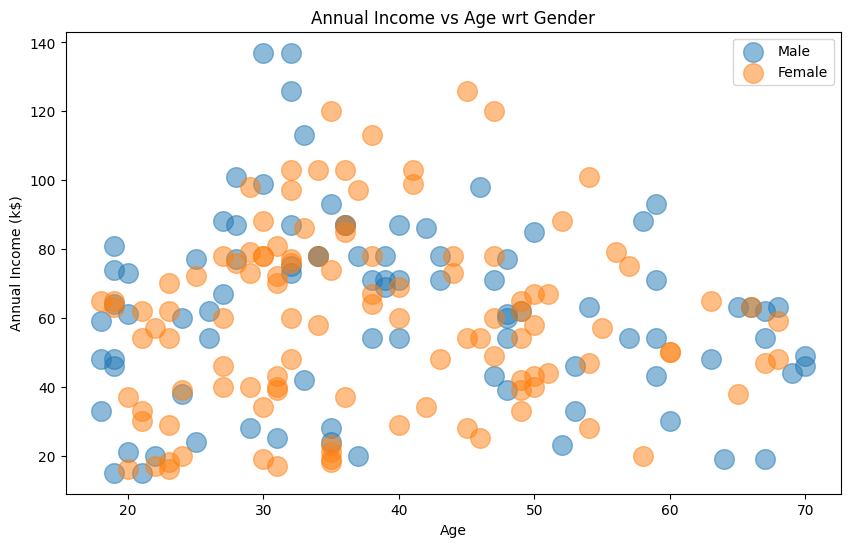

In [ ]:
plt.figure(figsize=(10,6))
for gender in ['Male','Female']:
    plt.scatter(x='Age',y='Annual Income (k$)',data=df[df['Gender']==gender],s=200,alpha=0.5,label=gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Annual Income vs Age wrt Gender')
plt.legend()
plt.show()

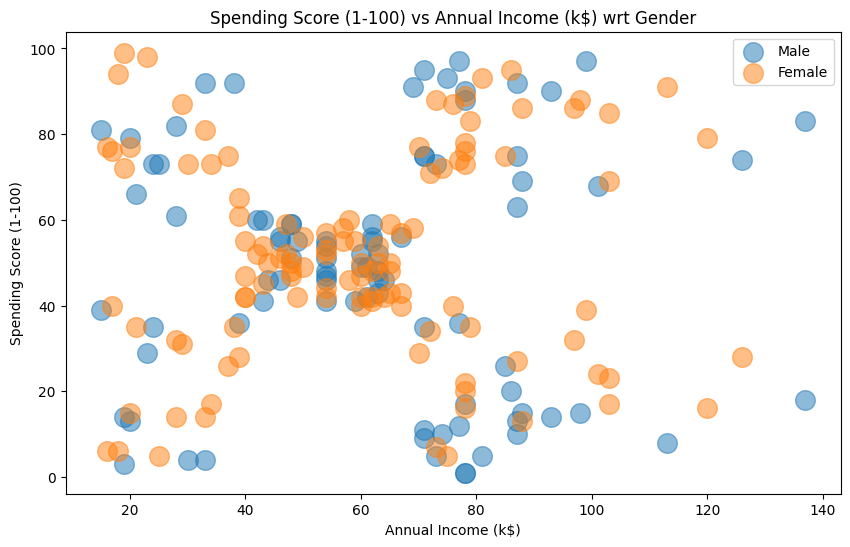

In [ ]:
plt.figure(figsize=(10,6))
for gender in ['Male','Female']:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df[df['Gender']==gender],s=200,alpha=0.5,label=gender)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$) wrt Gender')
plt.legend()
plt.show()

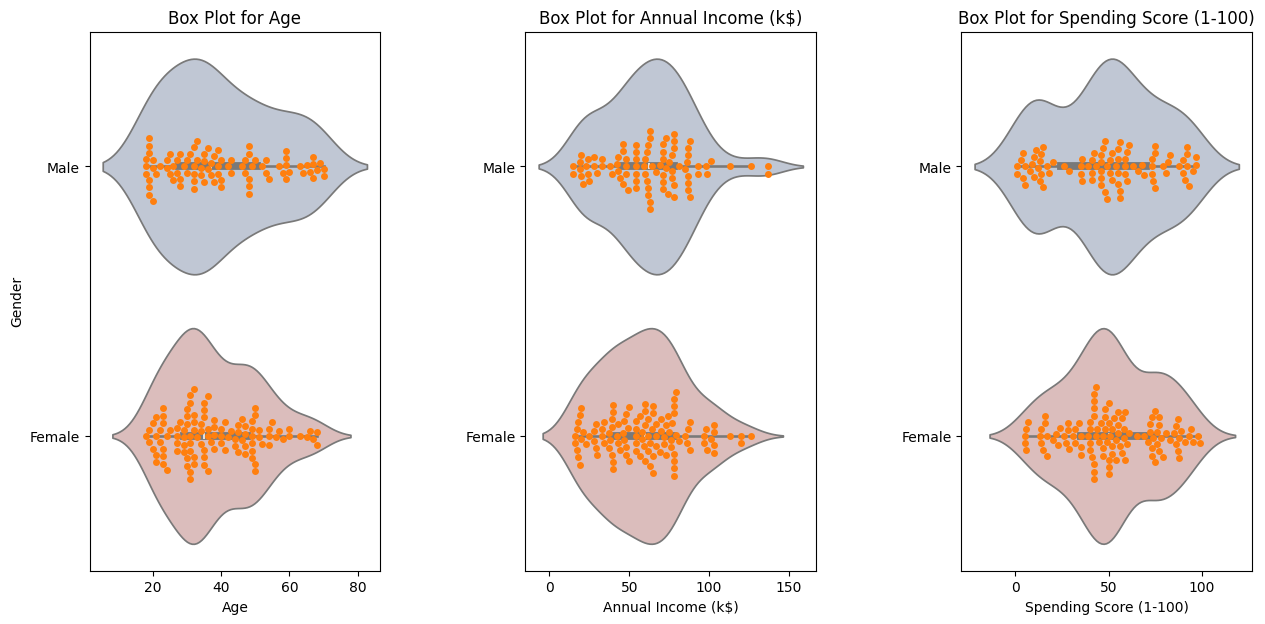

In [ ]:
#distribution of values in age,annual income and spending score according to gender
plt.figure(1,figsize=(15,7))
n=0
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=i,y='Gender',data=df,palette='vlag')
    sns.swarmplot(x=i,y='Gender',data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Box Plot for {}'.format(i))
plt.show()


In [ ]:
#clustering using k mean
#age and spending score
x1=df[['Age','Spending Score (1-100)']].iloc[:,:].values
inertia=[]
for n in range(1,11):
    kmeans=KMeans(n_clusters=n,init='k-means++',random_state=42)
    kmeans.fit(x1)
    inertia.append(kmeans.inertia_)

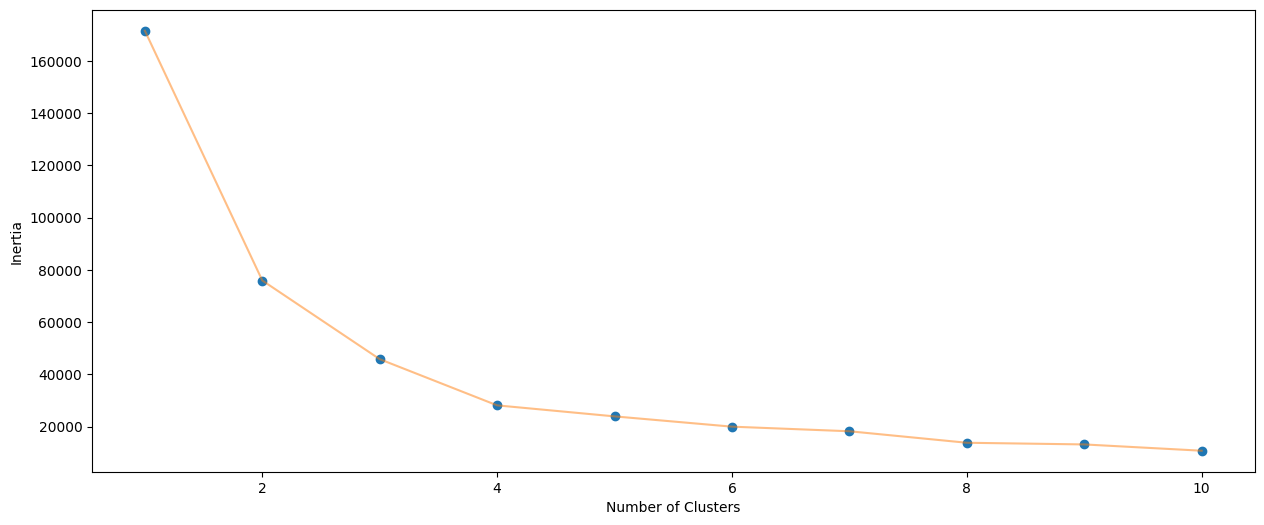

In [ ]:
#selecting n clusters based on inertia(squared distance between centroids and data points,should be less)
plt.figure(1,figsize=(15,6))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=n,init='k-means++',random_state=42)
kmeans.fit(x1)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_


In [ ]:
h=0.02
x_min,x_max=x1[:,0].min()-1,x1[:,0].max()+1
y_min,y_max=x1[:,1].min()-1,x1[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z=kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

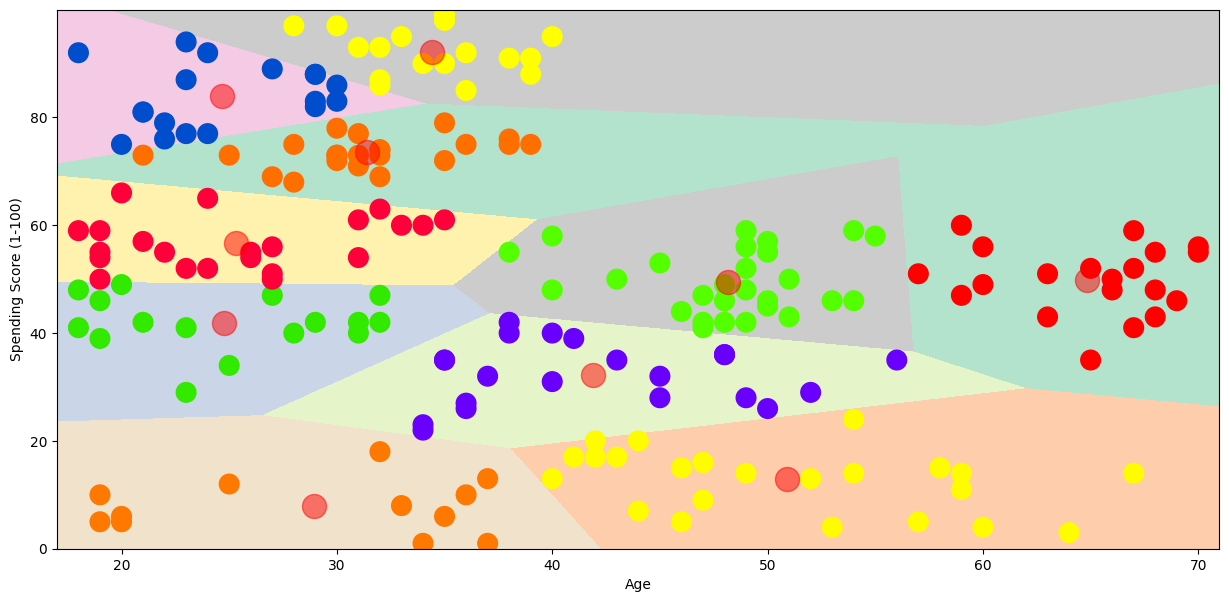

In [ ]:
plt.figure(1,figsize=(15,7))
plt.clf()
Z=z.reshape(xx.shape)
plt.imshow(Z,interpolation='nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap=plt.cm.Pastel2,aspect='auto',origin='lower')
plt.scatter(x='Age',y='Spending Score (1-100)',data=df,c=labels,s=200,cmap='prism')
plt.scatter(x=centroids[:,0],y=centroids[:,1],s=300,c='red',alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.show()

In [ ]:
#segmentation using annual income and spending score
x2=df[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values
inertia=[]
for n in range(1,11):
    kmeans=KMeans(n_clusters=n,init='k-means++',random_state=42)
    kmeans.fit(x2)
    inertia.append(kmeans.inertia_)

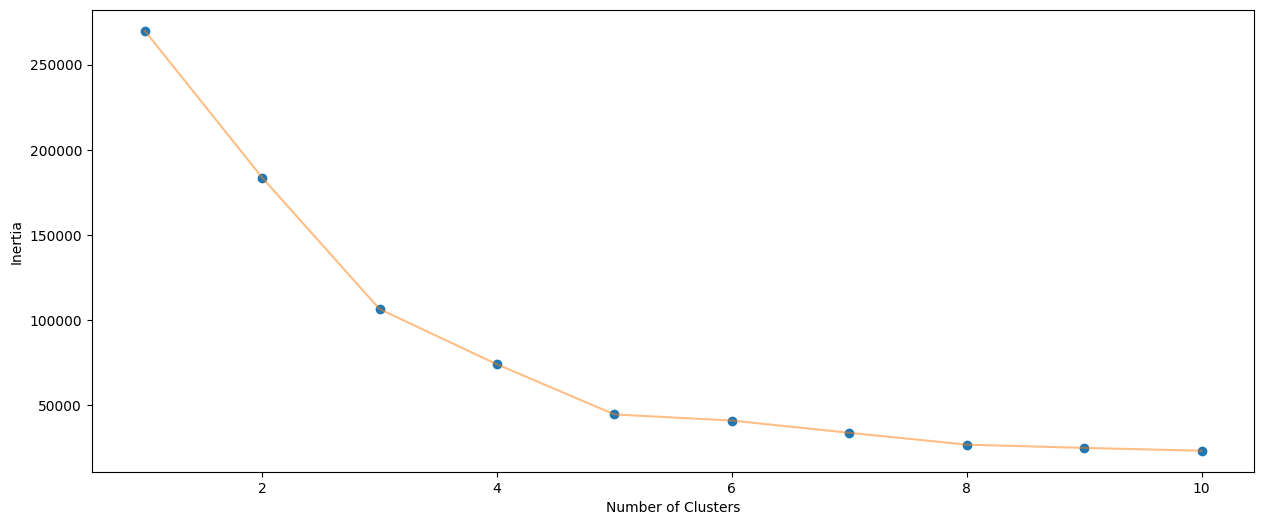

In [ ]:
plt.figure(1,figsize=(15,6))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=n,init='k-means++',random_state=42)
kmeans.fit(x2)
labels2=kmeans.labels_
centroids2=kmeans.cluster_centers_


In [ ]:
h=0.02
x_min,x_max=x2[:,0].min()-1,x2[:,0].max()+1
y_min,y_max=x2[:,1].min()-1,x2[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z2=kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

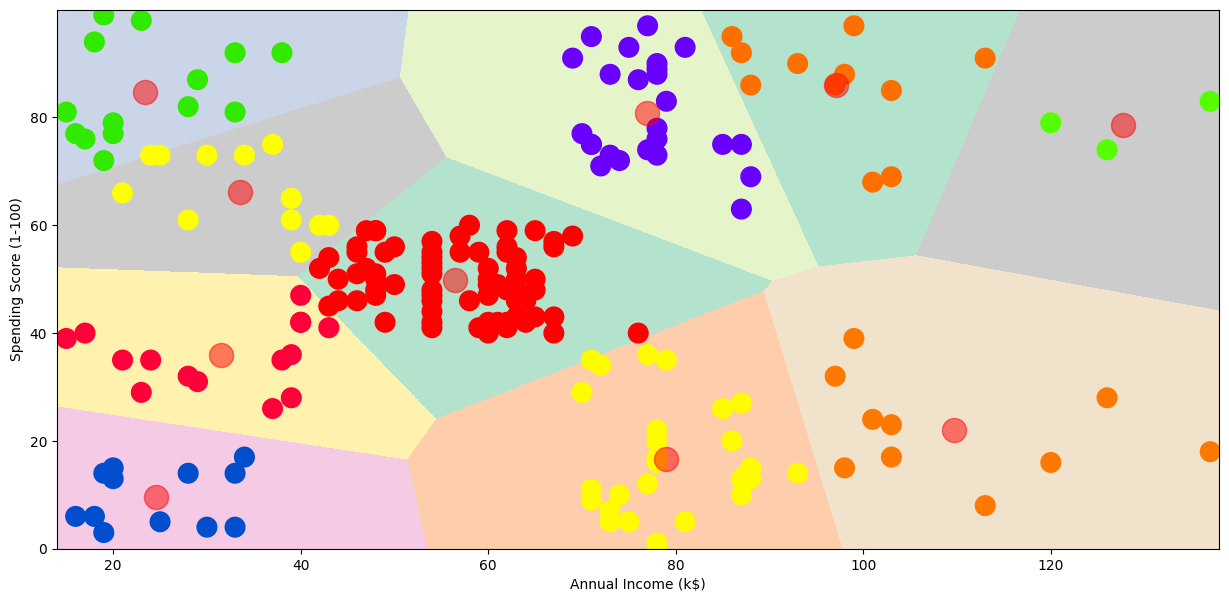

In [ ]:
plt.figure(1,figsize=(15,7))
plt.clf()
Z2=z2.reshape(xx.shape)
plt.imshow(Z2,interpolation='nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap=plt.cm.Pastel2,aspect='auto',origin='lower')
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,c=labels2,s=200,cmap='prism')
plt.scatter(x=centroids2[:,0],y=centroids2[:,1],s=300,c='red',alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.show()

In [ ]:
#segmentation using age,annual income and spending score
x3=df[['Age','Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values
inertia=[]
for n in range(1,11):
    kmeans=KMeans(n_clusters=n,init='k-means++',random_state=42)
    kmeans.fit(x3)
    inertia.append(kmeans.inertia_)


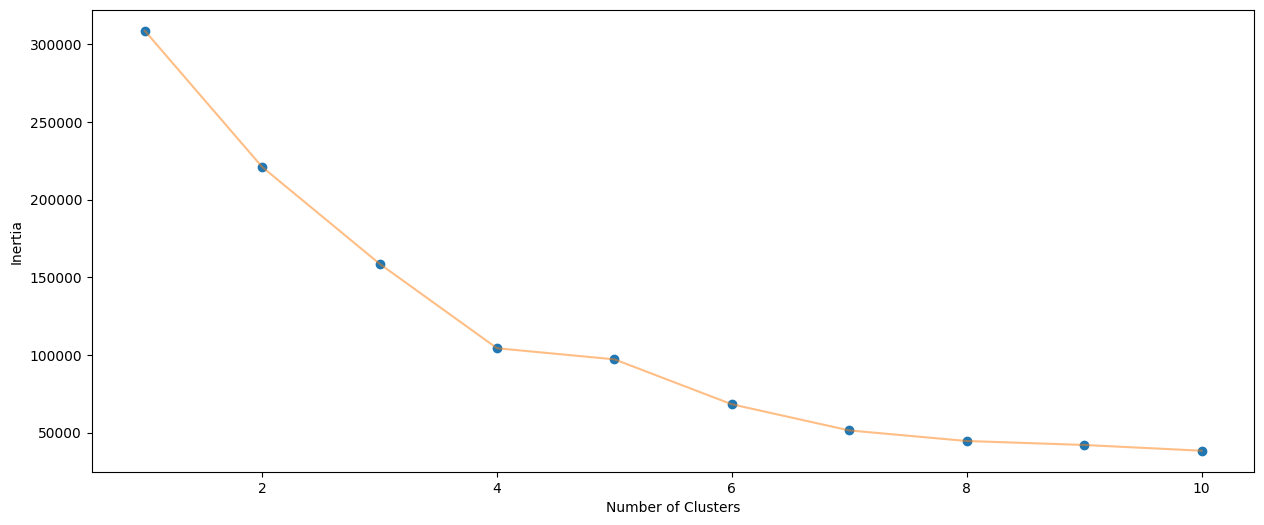

In [ ]:
plt.figure(1,figsize=(15,6))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)
kmeans.fit(x3)
labels3=kmeans.labels_
centroids3=kmeans.cluster_centers_


In [ ]:
df['label3']=labels3
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
         color=df['label3'],
         size=20,

         line=dict(
                 color=df['label3'],
                 width=12
             ),
             opacity=0.8
         )
     )
data=[trace1]
layout= go.Layout(
    title='clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score (1-100)'),
        zaxis=dict(title='Annual Income (k$)')
    )
    )
fig=go.Figure(data=data,layout=layout)
py.offline.iplot(fig)

In [ ]:
#feature selection for model
df.head(8)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label3
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5
5,6,Female,22,17,76,2
6,7,Female,35,18,6,5
7,8,Female,23,18,94,2


In [ ]:
p=df.iloc[:,3:5].values

In [ ]:
#building the model
#kmean algorithm to decide the optimum cluster number,kmeans++ using elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmean.fit(p)
  wcss.append(kmean.inertia_)

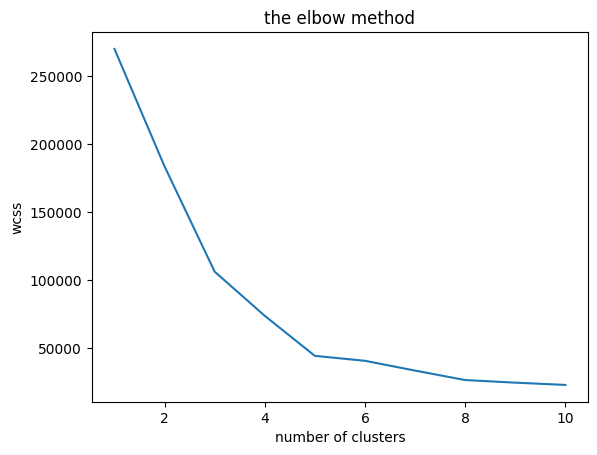

In [ ]:
#visualize the elbow method to optimize the value of k
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#finally we got k=5
#model build
kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeansmodel.fit_predict(p)

# for unsupervised learning we use " fit_predict() " wherein for supervised learning we use "fit_transform()"
#y_kmeans is the final model. now how and where wewill deploy this model in production is depends on what tool we are using.
#this use case is verycommon and it is used in bfs industry(credit card) and retail for customer segmentaton.

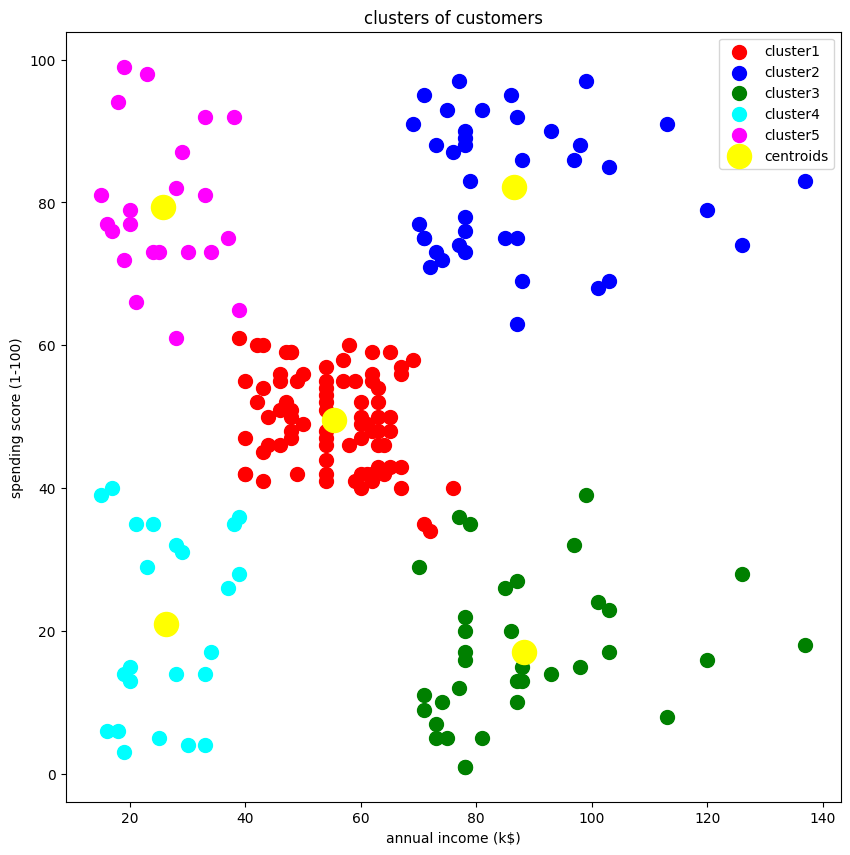

In [ ]:
#visualizing all the clusters
plt.figure(figsize=(10,10))
plt.scatter(p[y_kmeans==0,0],p[y_kmeans==0,1],s=100,c='red',label='cluster1')
plt.scatter(p[y_kmeans==1,0],p[y_kmeans==1,1],s=100,c='blue',label='cluster2')
plt.scatter(p[y_kmeans==2,0],p[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.scatter(p[y_kmeans==3,0],p[y_kmeans==3,1],s=100,c='cyan',label='cluster4')
plt.scatter(p[y_kmeans==4,0],p[y_kmeans==4,1],s=100,c='magenta',label='cluster5')
plt.scatter(kmeansmodel.cluster_centers_[:,0],kmeansmodel.cluster_centers_[:,1],s=300,c='yellow',label='centroids')
plt.title('clusters of customers')
plt.xlabel('annual income (k$)')
plt.ylabel('spending score (1-100)')
plt.legend()
plt.show()

#  **MODEL INTERPRETATION**

cluster 1 :- earning high but spending less

cluster 2:- average in terms of earning and spending

cluster 3:- earning high and also spending high(target set)

cluster 4 :- earning less but spending more

cluster5 :- earning less , spending less